# Lab Exercise VI – Dynamic Time Warping (DTW)

**Aim:**
To compare and align two numerical sequences using Dynamic Time Warping (DTW) and evaluate their similarity based on the DTW distance.

---

## Given Data
- **Vector 1:** [2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2]
- **Vector 2:** [2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1]

## 1. Setup
We import `numpy` for matrix operations and `matplotlib` for visualization. We also define two numerical sequences (vectors) that we want to compare.
- **Vector 1**: Shorter sequence.
- **Vector 2**: Longer sequence.
DTW will help us measure the similarity between these sequences despite their different lengths.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vectors
vector1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
vector2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])

## 1. Plot both vectors to visualize their patterns

## 2. Initial Visualization
We plot the two vectors to observe their shape. You can see that they have similar patterns (peaks and valleys) but are misaligned in time and have different lengths.

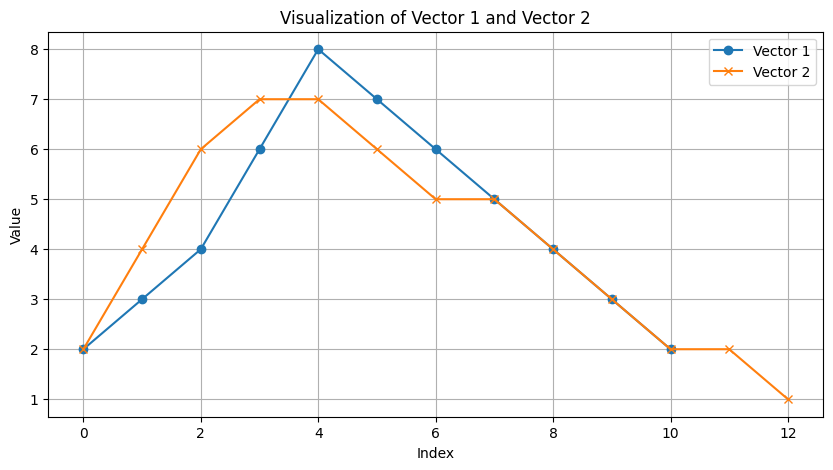

In [2]:
plt.figure(figsize=(10, 5))
plt.plot(vector1, label='Vector 1', marker='o')
plt.plot(vector2, label='Vector 2', marker='x')
plt.title('Visualization of Vector 1 and Vector 2')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## 2. Implement the Dynamic Time Warping (DTW) algorithm

DTW aligns two sequences by minimizing the cumulative distance between their elements, allowing for stretching and compression along the time axis.

## 3. Dynamic Time Warping (DTW) Algorithm
This function implements the DTW algorithm.
1.  **Cost Matrix**: We compute a matrix where each cell $(i, j)$ represents the distance (absolute difference) between point $x_i$ and $y_j$.
2.  **Accumulated Cost Matrix**: We calculate the cumulative cost to reach each cell $(i, j)$ from $(0, 0)$. The recurrence relation is:
    $$D(i, j) = C(i, j) + \min(D(i-1, j), D(i, j-1), D(i-1, j-1))$$
    This allows for diagonal (match), vertical (insertion), and horizontal (deletion) moves.
3.  **Optimal Path**: We backtrack from the bottom-right corner to the top-left to find the path that minimizes the total cost.

In [3]:
def dtw(x, y):
    n, m = len(x), len(y)
    cost = np.zeros((n, m))
    # Compute cost matrix
    for i in range(n):
        for j in range(m):
            cost[i, j] = abs(x[i] - y[j])
    # Accumulated cost matrix
    acc_cost = np.zeros((n, m))
    acc_cost[0, 0] = cost[0, 0]
    for i in range(1, n):
        acc_cost[i, 0] = cost[i, 0] + acc_cost[i-1, 0]
    for j in range(1, m):
        acc_cost[0, j] = cost[0, j] + acc_cost[0, j-1]
    for i in range(1, n):
        for j in range(1, m):
            acc_cost[i, j] = cost[i, j] + min(acc_cost[i-1, j], acc_cost[i, j-1], acc_cost[i-1, j-1])
    # Find optimal path
    path = []
    i, j = n-1, m-1
    path.append((i, j))
    while i > 0 or j > 0:
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            min_idx = np.argmin([acc_cost[i-1, j], acc_cost[i, j-1], acc_cost[i-1, j-1]])
            if min_idx == 0:
                i -= 1
            elif min_idx == 1:
                j -= 1
            else:
                i -= 1
                j -= 1
        path.append((i, j))
    path.reverse()
    return acc_cost, path, acc_cost[-1, -1]

## 3. Compute the accumulated cost matrix

## 4. Compute Cost Matrix
We execute the `dtw` function. This returns:
- `acc_cost`: The accumulated cost matrix.
- `path`: The list of indices $(i, j)$ forming the optimal warping path.
- `dtw_distance`: The total cost of the optimal path.

In [4]:
acc_cost, path, dtw_distance = dtw(vector1, vector2)
print('Accumulated Cost Matrix:')
print(acc_cost)

Accumulated Cost Matrix:
[[ 0.  2.  6. 11. 16. 20. 23. 26. 28. 29. 29. 29. 30.]
 [ 1.  1.  4.  8. 12. 15. 17. 19. 20. 20. 21. 22. 24.]
 [ 3.  1.  3.  6.  9. 11. 12. 13. 13. 14. 16. 18. 21.]
 [ 7.  3.  1.  2.  3.  3.  4.  5.  7. 10. 14. 18. 23.]
 [13.  7.  3.  2.  3.  5.  6.  7.  9. 12. 16. 20. 25.]
 [18. 10.  4.  2.  2.  3.  5.  7. 10. 13. 17. 21. 26.]
 [22. 12.  4.  3.  3.  2.  3.  4.  6.  9. 13. 17. 22.]
 [25. 13.  5.  5.  5.  3.  2.  2.  3.  5.  8. 11. 15.]
 [27. 13.  7.  8.  8.  5.  3.  3.  2.  3.  5.  7. 10.]
 [28. 14. 10. 11. 12.  8.  5.  5.  3.  2.  3.  4.  6.]
 [28. 16. 14. 15. 16. 12.  8.  8.  5.  3.  2.  2.  3.]]


## 4. Find and visualize the optimal warping path

## 5. Visualizing the Warping Path
We visualize the accumulated cost matrix as a heatmap.
- **Darker/Blue regions** represent lower cost.
- **The Red Line** is the optimal warping path. It shows how the indices of Vector 1 map to Vector 2. A diagonal line indicates perfect alignment, while vertical/horizontal segments indicate time warping (stretching/compressing).

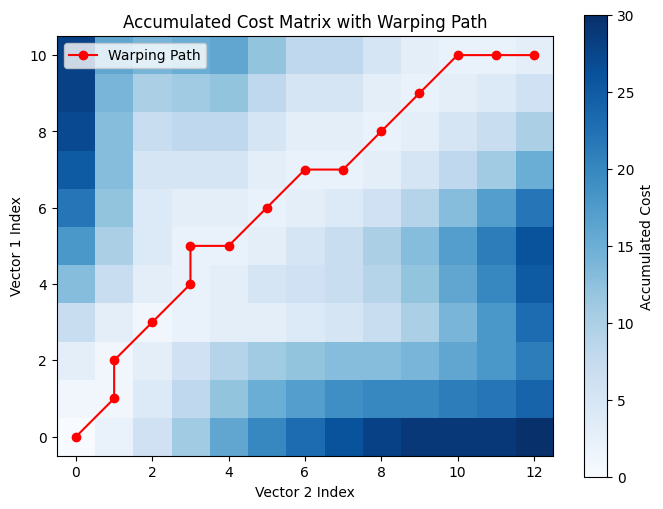

In [5]:
plt.figure(figsize=(8, 6))
plt.imshow(acc_cost, origin='lower', cmap='Blues', interpolation='nearest')
plt.colorbar(label='Accumulated Cost')
plt.title('Accumulated Cost Matrix with Warping Path')
plt.xlabel('Vector 2 Index')
plt.ylabel('Vector 1 Index')
path_x, path_y = zip(*path)
plt.plot(path_y, path_x, marker='o', color='red', label='Warping Path')
plt.legend()
plt.show()

## 5. Calculate the DTW distance between the vectors

## 6. DTW Distance
The final DTW distance is a measure of similarity. A lower value indicates that the two sequences are more similar after optimal time alignment.

In [6]:
print(f'DTW Distance between Vector 1 and Vector 2: {dtw_distance:.2f}')

DTW Distance between Vector 1 and Vector 2: 3.00


## 6. Inference

**Inference:**

Dynamic Time Warping (DTW) effectively aligns two sequences even when they are temporally distorted or stretched. The warping path shows how one vector must be time-warped to match the other, allowing for non-linear mapping between the sequences. The DTW distance quantifies the similarity: a smaller value indicates greater similarity. In this case, the warping path compresses and stretches parts of Vector 2 to best match Vector 1, demonstrating DTW's ability to handle time shifts and distortions.